In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go 
from plotly.offline import iplot

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("set_datos.csv", sep=';')

In [3]:
df.head()

,id_credito,numero_radicacion,numero_radicacion_credito_antiguo,fecha_originacion,valor_esperado,capital,interes,seguros,valor_recibido,porcentaje_incorporacion,...,altura_mora_calculada,saldo_vencido,saldo_capital,capital_mora,intereses_corrientes_mora,seguros_mora,intereses_mora,gastos_cobranza,tasa_mensual_credito,credito_nuevo
0,1693,1,NaN,2013-08-15,124094.0,56041.0,64633.0,3420,124094,100.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1535,NO
1,1693,1,NaN,2013-08-15,124094.0,57248.0,63426.0,3420,124094,100.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1535,NO
2,1693,1,NaN,2013-08-15,124094.0,58481.0,62193.0,3420,124094,100.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1535,NO
3,1693,1,NaN,2013-08-15,124094.0,59740.0,60934.0,3420,124094,100.0,...,0,0.0,2769804.0,0.0,0.0,0.0,0.0,0.0,2.1535,NO
4,1693,1,NaN,2013-08-15,124094.0,61027.0,59647.0,3420,124094,100.0,...,0,0.0,2708777.0,0.0,0.0,0.0,0.0,0.0,2.1535,NO


In [4]:
df.describe()

,id_credito,numero_radicacion,numero_radicacion_credito_antiguo,valor_esperado,capital,interes,seguros,valor_recibido,porcentaje_incorporacion,valor_otros_conceptos,...,valor_aplicado,altura_mora_calculada,saldo_vencido,saldo_capital,capital_mora,intereses_corrientes_mora,seguros_mora,intereses_mora,gastos_cobranza,tasa_mensual_credito
count,282767.000000,282767.000000,11985.000000,2.827670e+05,2.821250e+05,2.821250e+05,282767.000000,2.827670e+05,282767.000000,2.827670e+05,...,4.500000e+01,282767.000000,2.779110e+05,2.779110e+05,2.779110e+05,2.779110e+05,2.779110e+05,2.779110e+05,2.779110e+05,282767.000000
mean,21298.851220,14897.044609,12229.428285,5.107488e+05,1.032817e+05,3.385206e+05,70243.025325,4.698052e+05,94.090507,1.118069e+04,...,8.379185e+06,22.011172,-4.432957e+05,1.645434e+07,1.446644e+05,2.831462e+05,4.049885e+04,3.043783e+04,9.027720e+04,2.022017
std,15888.075236,9170.766630,6709.637302,4.238262e+05,2.174457e+05,2.960095e+05,66923.220772,4.338755e+05,27.001580,2.007154e+05,...,1.146107e+07,100.387269,2.545793e+06,1.471244e+07,9.436405e+05,1.574721e+06,2.391372e+05,3.069764e+05,5.826793e+05,0.110769
min,1693.000000,1.000000,18.000000,2.209100e+04,1.699000e+03,-1.953870e+05,0.000000,0.000000e+00,0.000000,0.000000e+00,...,2.830000e+05,0.000000,-7.866140e+07,-9.175200e+04,-1.027680e+05,-1.095080e+05,-2.177200e+04,0.000000e+00,0.000000e+00,1.300000
25%,6730.000000,4312.000000,7037.000000,2.050550e+05,3.080800e+04,1.232620e+05,23830.000000,1.646960e+05,100.000000,0.000000e+00,...,1.845412e+06,0.000000,0.000000e+00,5.784579e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.950000
50%,18423.000000,15417.000000,12449.000000,3.713250e+05,6.438700e+04,2.413190e+05,49828.000000,3.316950e+05,100.000000,0.000000e+00,...,3.601400e+06,0.000000,0.000000e+00,1.170236e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000
75%,33251.000000,21607.000000,16964.000000,6.906580e+05,1.262510e+05,4.618640e+05,93812.000000,6.482990e+05,100.000000,0.000000e+00,...,8.500000e+06,0.000000,0.000000e+00,2.255652e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.110000
max,67189.000000,36907.000000,35110.000000,3.354147e+06,4.649288e+07,2.151362e+06,458745.000000,9.409459e+06,1624.270000,4.662007e+07,...,4.628450e+07,1620.000000,1.147842e+07,9.893066e+07,4.122953e+07,5.090805e+07,9.519440e+06,1.673776e+07,2.021286e+07,2.300000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282767 entries, 0 to 282766
Data columns (total 35 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id_credito                         282767 non-null  int64  
 1   numero_radicacion                  282767 non-null  int64  
 2   numero_radicacion_credito_antiguo  11985 non-null   float64
 3   fecha_originacion                  282767 non-null  object 
 4   valor_esperado                     282767 non-null  float64
 5   capital                            282125 non-null  float64
 6   interes                            282125 non-null  float64
 7   seguros                            282767 non-null  int64  
 8   valor_recibido                     282767 non-null  int64  
 9   porcentaje_incorporacion           282767 non-null  float64
 10  causal_incorporacion               23450 non-null   object 
 11  tipo_causal                        2283

## TRATAMIENTO DE DATOS

### Indentidicar datos nulos

<AxesSubplot:>

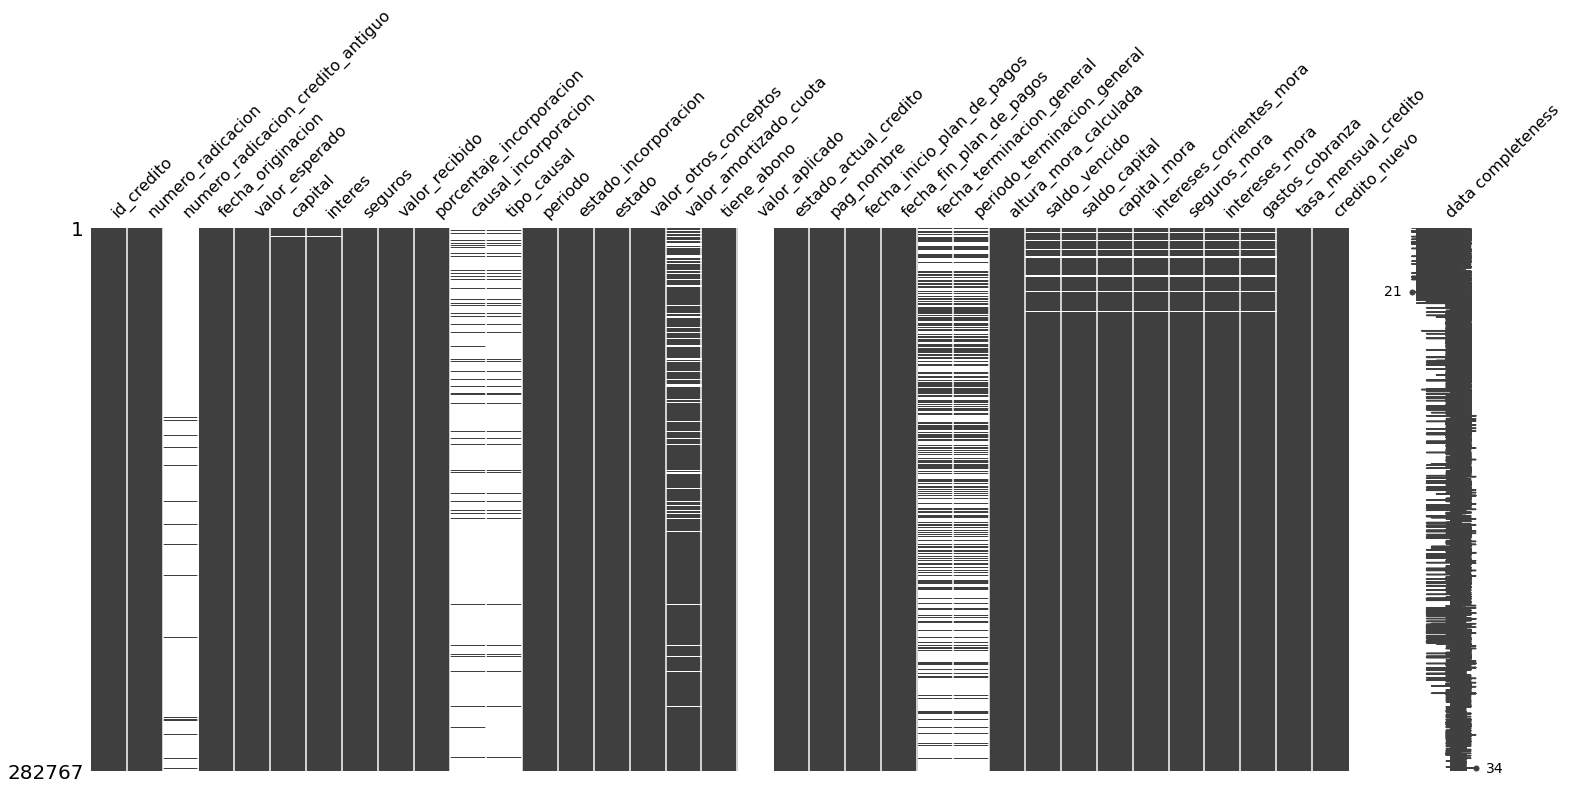

In [6]:
msno.matrix(df, labels=True)

### Eliminar columnas con demasiados nulos

In [7]:
df.drop(['numero_radicacion_credito_antiguo', 
        'causal_incorporacion', 
        'tipo_causal', 
        'valor_aplicado',
        'fecha_terminacion_general', 
        'periodo_terminacion_general'], axis=1, inplace=True)

<AxesSubplot:>

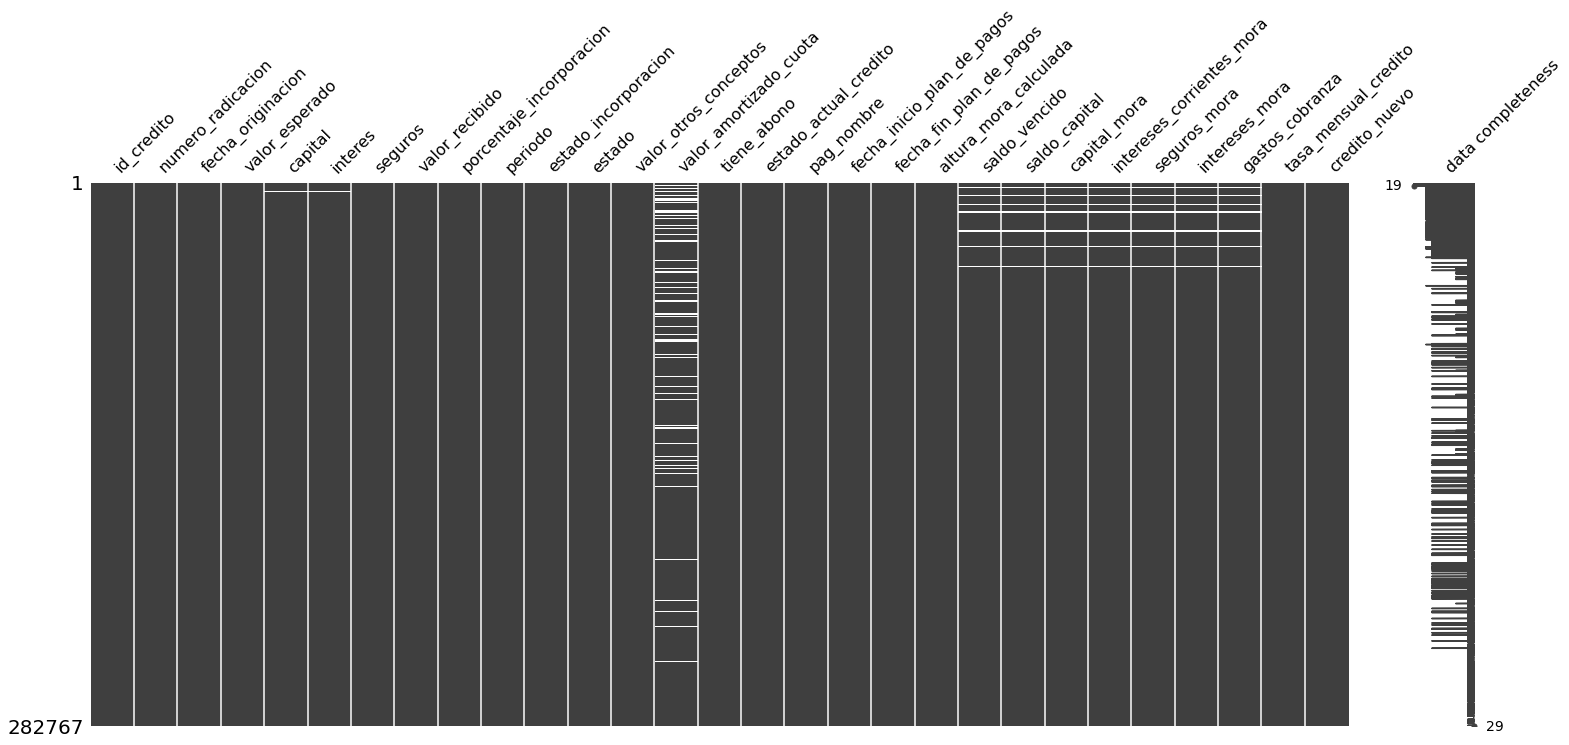

In [8]:
msno.matrix(df, labels=True)

### Eliminar filas con nulos

In [9]:
df.dropna(inplace=True)

<AxesSubplot:>

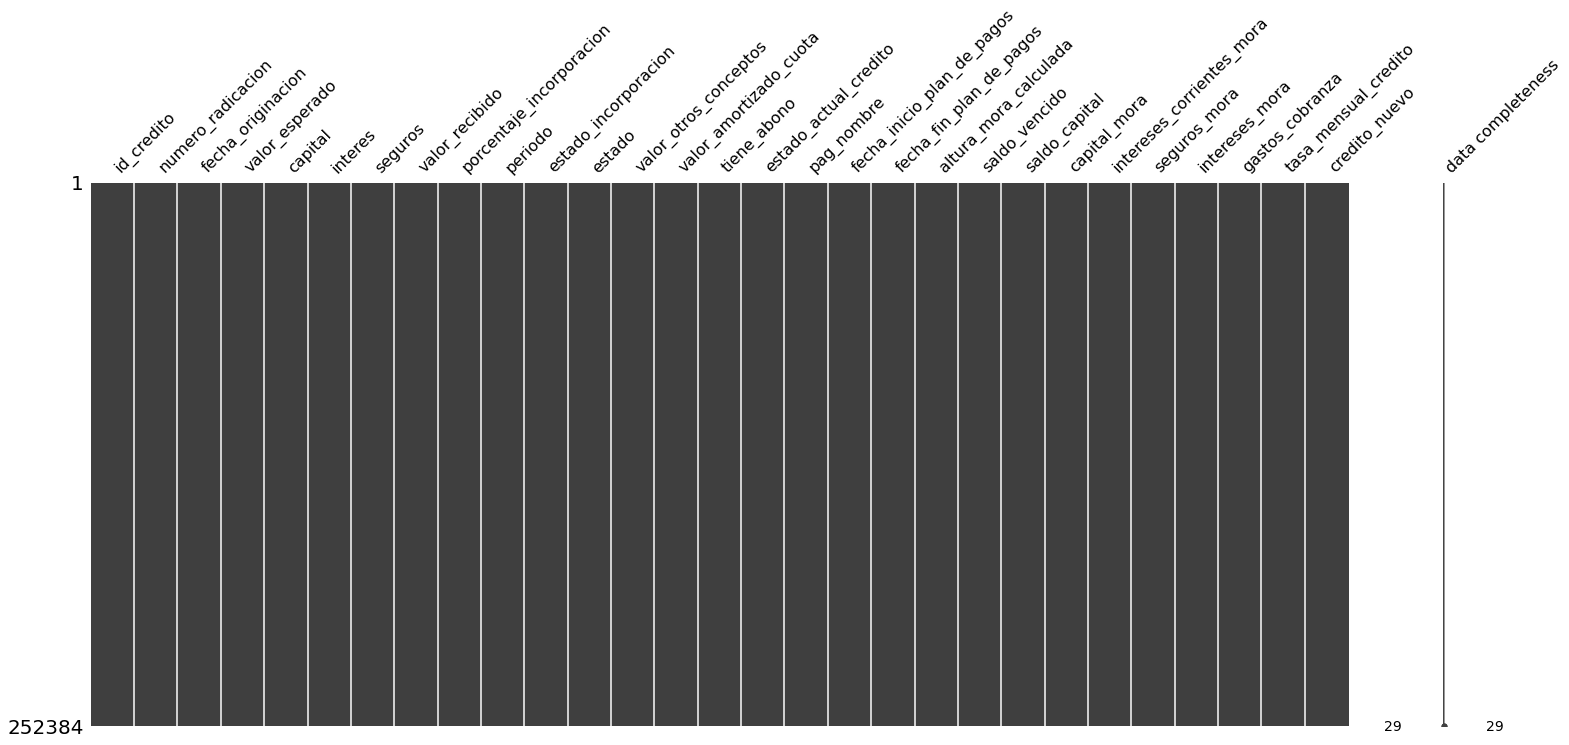

In [10]:
msno.matrix(df, labels=True)

In [11]:
#df.to_excel('set_datos.xlsx')

## INGENIERÍA DE CARACTERISTICAS

In [12]:
creditos = df['id_credito'].unique().tolist()
creditos[:5]

[1693, 1695, 1696, 1699, 1700]

In [13]:
len(creditos)

22949

In [14]:
cliente = df[df['id_credito']==66413]

In [15]:
new_columns = ['id_credito',
            'numero_radicacion',
            'fecha_originacion',
            'valor_esperado',
            'capital',
            'interes',
            'seguros',
            'valor_recibido',
            'total_cuotas',
            'n_pagos_esperados',
            'n_pagos_mayores',
            'n_pagos_menores',
            'n_pagos_cero',
            'porcentaje_incorporacion',
            'p_incorporacion_promedio',
            'periodo',
            'estado_incorporacion',
            'estado',
            'n_al_dia',
            'n_mora',
            'valor_otros_conceptos',
            'valor_amortizado_cuota',
            'tiene_abono',
            'n_abonos',
            'n_no_abonos',
            'estado_actual_credito',
            'pag_nombre',
            'fecha_inicio_plan_de_pagos',
            'fecha_fin_plan_de_pagos',
            'altura_mora_calculada',
            'saldo_vencido',
            'saldo_capital',
            'capital_mora',
            'intereses_corrientes_mora',
            'seguros_mora',
            'intereses_mora',
            'intereses_mora_promedio',
            'gastos_cobranza',
            'gastos_cobranza_promedio',
            'tasa_mensual_credito',
            'credito_nuevo',
            'pago_consecutivo']


In [16]:
def label(x):
    if (len(x) >= 3) & (list(x['estado'].tail(3)=='AL_DIA').count(True) == 3):
        return 1
    elif (len(x) < 3) & (list(x['estado']=='AL_DIA').count(False) == 0):
        return 1
    else:
        return 0

In [17]:
base_clientes = pd.DataFrame(columns=new_columns)

In [18]:
for c in creditos:
    cliente = df[df['id_credito']==c]
    #Campos calculados
    #=================
    total_cuotas = len(cliente)
    n_pagos_esperados = list(cliente['valor_esperado'] == cliente['valor_recibido']).count(True)
    n_pagos_mayores = list(cliente['valor_esperado'] < cliente['valor_recibido']).count(True)
    n_pagos_menores = list((cliente['valor_recibido'] > 0) & (cliente['valor_recibido'] < cliente['valor_esperado'])).count(True)
    n_pagos_cero = list(0 == cliente['valor_recibido']).count(True)

    p_incorporacion_promedio = cliente['porcentaje_incorporacion'].mean()

    n_al_dia = list(cliente['estado']=='AL_DIA').count(True)
    n_mora = list(cliente['estado']=='MORA').count(True)

    n_abonos = list(cliente['tiene_abono']=='Con abono').count(True)
    n_no_abonos = list(cliente['tiene_abono']=='Sin abono').count(True)

    intereses_mora_promedio = cliente['intereses_mora'].mean()
    gastos_cobranza_promedio = cliente['gastos_cobranza'].mean()

    #pago_consecutivo = 1 if 3 == list(cliente['estado'].tail(3)=='AL_DIA').count(True) else 0 # Variable objetivo
    pago_consecutivo = label(cliente)

    #Agregar al dataframe de clientes
    #================================

    base_clientes = base_clientes.append(
                    {'id_credito': int(cliente.iloc[-1]['id_credito']),
                    'numero_radicacion': cliente.iloc[-1]['numero_radicacion'],
                    'fecha_originacion': cliente.iloc[-1]['fecha_originacion'],
                    'valor_esperado': cliente.iloc[-1]['valor_esperado'],
                    'capital': cliente.iloc[-1]['capital'],
                    'interes': cliente.iloc[-1]['interes'],
                    'seguros': cliente.iloc[-1]['seguros'],
                    'valor_recibido': cliente.iloc[-1]['valor_recibido'],
                    'total_cuotas': total_cuotas,
                    'n_pagos_esperados': n_pagos_esperados,
                    'n_pagos_mayores': n_pagos_mayores,
                    'n_pagos_menores': n_pagos_menores,
                    'n_pagos_cero': n_pagos_cero,
                    'porcentaje_incorporacion': cliente.iloc[-1]['porcentaje_incorporacion'],
                    'p_incorporacion_promedio': p_incorporacion_promedio,
                    'periodo': cliente.iloc[-1]['periodo'],
                    'estado_incorporacion': cliente.iloc[-1]['estado_incorporacion'],
                    'estado': cliente.iloc[-1]['estado'],
                    'n_al_dia': n_al_dia,
                    'n_mora': n_mora,
                    'valor_otros_conceptos': cliente.iloc[-1]['valor_otros_conceptos'],
                    'valor_amortizado_cuota': cliente.iloc[-1]['valor_amortizado_cuota'],
                    'tiene_abono': cliente.iloc[-1]['tiene_abono'],
                    'n_abonos': n_abonos,
                    'n_no_abonos': n_no_abonos,
                    'estado_actual_credito': cliente.iloc[-1]['estado_actual_credito'],
                    'pag_nombre': cliente.iloc[-1]['pag_nombre'],
                    'fecha_inicio_plan_de_pagos': cliente.iloc[-1]['fecha_inicio_plan_de_pagos'],
                    'fecha_fin_plan_de_pagos': cliente.iloc[-1]['fecha_fin_plan_de_pagos'],
                    'altura_mora_calculada': cliente.iloc[-1]['altura_mora_calculada'],
                    'saldo_vencido': cliente.iloc[-1]['saldo_vencido'],
                    'saldo_capital': cliente.iloc[-1]['saldo_capital'],
                    'capital_mora': cliente.iloc[-1]['capital_mora'],
                    'intereses_corrientes_mora': cliente.iloc[-1]['intereses_corrientes_mora'],
                    'seguros_mora': cliente.iloc[-1]['seguros_mora'],
                    'intereses_mora': cliente.iloc[-1]['intereses_mora'],
                    'intereses_mora_promedio': intereses_mora_promedio,
                    'gastos_cobranza': cliente.iloc[-1]['gastos_cobranza'],
                    'gastos_cobranza_promedio': gastos_cobranza_promedio,
                    'tasa_mensual_credito': cliente.iloc[-1]['tasa_mensual_credito'],
                    'credito_nuevo': cliente.iloc[-1]['credito_nuevo'],
                    'pago_consecutivo': pago_consecutivo}, 
                    ignore_index=True
    )

In [19]:
base_clientes

,id_credito,numero_radicacion,fecha_originacion,valor_esperado,capital,interes,seguros,valor_recibido,total_cuotas,n_pagos_esperados,...,capital_mora,intereses_corrientes_mora,seguros_mora,intereses_mora,intereses_mora_promedio,gastos_cobranza,gastos_cobranza_promedio,tasa_mensual_credito,credito_nuevo,pago_consecutivo
0,1693,1,2013-08-15,124094.0,66456.0,54218.0,3420,124094,6,6,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,2.1535,NO,1
1,1695,18,2013-09-26,92574.0,67242.0,23945.0,1387,92574,34,34,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,2.2000,NO,1
2,1696,19,2013-09-30,205535.0,190557.0,12854.0,2124,205535,5,1,...,-102768.0,0.0,0.0,0.0,1039.792,0.0,1459.872,2.2000,NO,0
3,1699,46,2013-10-25,216017.0,166383.0,46123.0,3511,216017,35,26,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.9000,NO,1
4,1700,51,2013-10-31,480758.0,214288.0,258868.0,7602,480758,9,7,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,2.0000,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22944,66562,36684,2019-05-07,364347.0,31259.0,267881.0,65207,364347,1,1,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.9000,NO,1
22945,66563,36729,2019-05-20,182174.0,11971.0,139956.0,30247,182174,1,1,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,2.1400,NO,1
22946,66694,36826,2019-05-16,347757.0,26703.0,260755.0,60299,347757,1,1,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,2.0000,NO,1
22947,66946,36907,2019-05-24,569154.0,46197.0,422701.0,100256,569154,1,1,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.9500,NO,1


In [20]:
base_clientes['pago_consecutivo'].value_counts()

1    20523
0     2426
Name: pago_consecutivo, dtype: int64

In [21]:
#base_clientes.to_excel('base_clientes.xlsx')

### Ajsutar formato fecha

In [22]:
df = base_clientes

In [23]:
fechas = ['fecha_originacion', 'periodo', 'fecha_inicio_plan_de_pagos', 'fecha_fin_plan_de_pagos']
for f in fechas:
    df[f] = pd.to_datetime(df[f])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22949 entries, 0 to 22948
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_credito                  22949 non-null  object        
 1   numero_radicacion           22949 non-null  object        
 2   fecha_originacion           22949 non-null  datetime64[ns]
 3   valor_esperado              22949 non-null  float64       
 4   capital                     22949 non-null  float64       
 5   interes                     22949 non-null  float64       
 6   seguros                     22949 non-null  object        
 7   valor_recibido              22949 non-null  object        
 8   total_cuotas                22949 non-null  object        
 9   n_pagos_esperados           22949 non-null  object        
 10  n_pagos_mayores             22949 non-null  object        
 11  n_pagos_menores             22949 non-null  object    

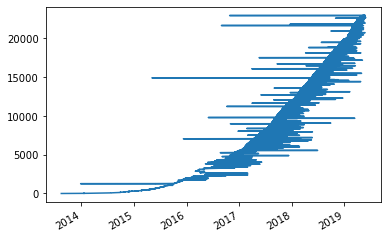

In [25]:
times = df['fecha_originacion']

fig, ax = plt.subplots(1)
fig.autofmt_xdate()
plt.plot(times, range(times.size))
plt.show()

In [26]:
for f in fechas:
    i = df.columns.get_loc(f)
    i += 1
    df.insert(i, f+'_year', df[f].dt.year)
    i += 1
    df.insert(i, f+'_month', df[f].dt.month)
    i += 1
    df.insert(i, f+'_day', df[f].dt.day)

In [27]:
df.drop(fechas, axis=1, inplace=True)

In [28]:
df

,id_credito,numero_radicacion,fecha_originacion_year,fecha_originacion_month,fecha_originacion_day,valor_esperado,capital,interes,seguros,valor_recibido,...,capital_mora,intereses_corrientes_mora,seguros_mora,intereses_mora,intereses_mora_promedio,gastos_cobranza,gastos_cobranza_promedio,tasa_mensual_credito,credito_nuevo,pago_consecutivo
0,1693,1,2013,8,15,124094.0,66456.0,54218.0,3420,124094,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,2.1535,NO,1
1,1695,18,2013,9,26,92574.0,67242.0,23945.0,1387,92574,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,2.2000,NO,1
2,1696,19,2013,9,30,205535.0,190557.0,12854.0,2124,205535,...,-102768.0,0.0,0.0,0.0,1039.792,0.0,1459.872,2.2000,NO,0
3,1699,46,2013,10,25,216017.0,166383.0,46123.0,3511,216017,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.9000,NO,1
4,1700,51,2013,10,31,480758.0,214288.0,258868.0,7602,480758,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,2.0000,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22944,66562,36684,2019,5,7,364347.0,31259.0,267881.0,65207,364347,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.9000,NO,1
22945,66563,36729,2019,5,20,182174.0,11971.0,139956.0,30247,182174,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,2.1400,NO,1
22946,66694,36826,2019,5,16,347757.0,26703.0,260755.0,60299,347757,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,2.0000,NO,1
22947,66946,36907,2019,5,24,569154.0,46197.0,422701.0,100256,569154,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.9500,NO,1


### Tratamiento de variables categóricas

In [29]:
categoricos_col = ['estado_incorporacion', 'tiene_abono', 'estado_actual_credito', 'pag_nombre']

for c in categoricos_col:
    df[c], _ = pd.factorize(df[c])

In [30]:
df[['estado_incorporacion', 'tiene_abono', 'estado_actual_credito', 'pag_nombre']]

,estado_incorporacion,tiene_abono,estado_actual_credito,pag_nombre
0,0,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,2
4,0,0,2,3
...,...,...,...,...
22944,5,0,3,270
22945,5,0,3,166
22946,5,0,3,87
22947,5,0,3,270


In [31]:
df['estado'] = pd.get_dummies(df['estado']).iloc[:,0]

AL_DIA = 1,
MORA   = 0

In [32]:
df['estado'].value_counts()

1    20883
0     2066
Name: estado, dtype: int64

### Remover variables innecesarias

In [33]:
df.drop(['id_credito', 'numero_radicacion', 'credito_nuevo', 'estado'], axis=1, inplace=True)

### División del dataset en: 
* X: Variables predictoras 
* Y: Variable objetivo

In [34]:
X = df.drop('pago_consecutivo', axis=1)
Y = df['pago_consecutivo']

In [35]:
Y = Y.astype(int)

## Asimetría, Curtorsis y Varianza

In [36]:
acv = {'ASIMETRÍA': X.skew(), 'CURTORSIS': X.kurt(), 'VARIANZA': X.var()}
acv =  pd.DataFrame(acv)
acv

,ASIMETRÍA,CURTORSIS,VARIANZA
fecha_originacion_year,-0.527792,-0.194251,1.399573e+00
fecha_originacion_month,0.065967,-1.283667,1.179787e+01
fecha_originacion_day,-0.662809,-0.744988,7.637831e+01
valor_esperado,1.663865,3.446468,1.803729e+11
capital,21.548593,1049.576568,2.345271e+10
interes,1.690692,3.622952,9.004280e+10
seguros,1.768379,3.824968,4.852011e+09
valor_recibido,1.896941,6.599982,1.920925e+11
total_cuotas,1.169779,1.109448,7.742674e+01
n_pagos_esperados,1.134050,1.041863,7.165249e+01


In [37]:
acv[acv['CURTORSIS'] >10]

,ASIMETRÍA,CURTORSIS,VARIANZA
capital,21.548593,1049.576568,2.345271e+10
n_pagos_mayores,11.002003,144.604747,4.908891e+00
n_pagos_menores,13.127002,233.395583,2.395043e+00
n_pagos_cero,15.253627,448.449072,1.226825e+00
porcentaje_incorporacion,8.813697,468.822177,9.280568e+02
p_incorporacion_promedio,0.896448,204.978841,2.886496e+02
periodo_day,-4.182007,15.490529,1.861681e-01
n_mora,7.927213,88.993817,4.122796e+00
valor_otros_conceptos,30.811659,1734.431229,1.751012e+10
valor_amortizado_cuota,2.422611,19.210096,1.868446e+11


In [38]:
list_col = acv.query('CURTORSIS > 10').index.tolist()

In [39]:
remover = ['tiene_abono', 'n_pagos_mayores', 'n_pagos_menores', 'n_pagos_cero', 'periodo_day', 'n_mora', 'tiene_abono', 'n_abonos']
list_col = [e for e in list_col if e not in remover]

In [40]:
len(list_col)

14

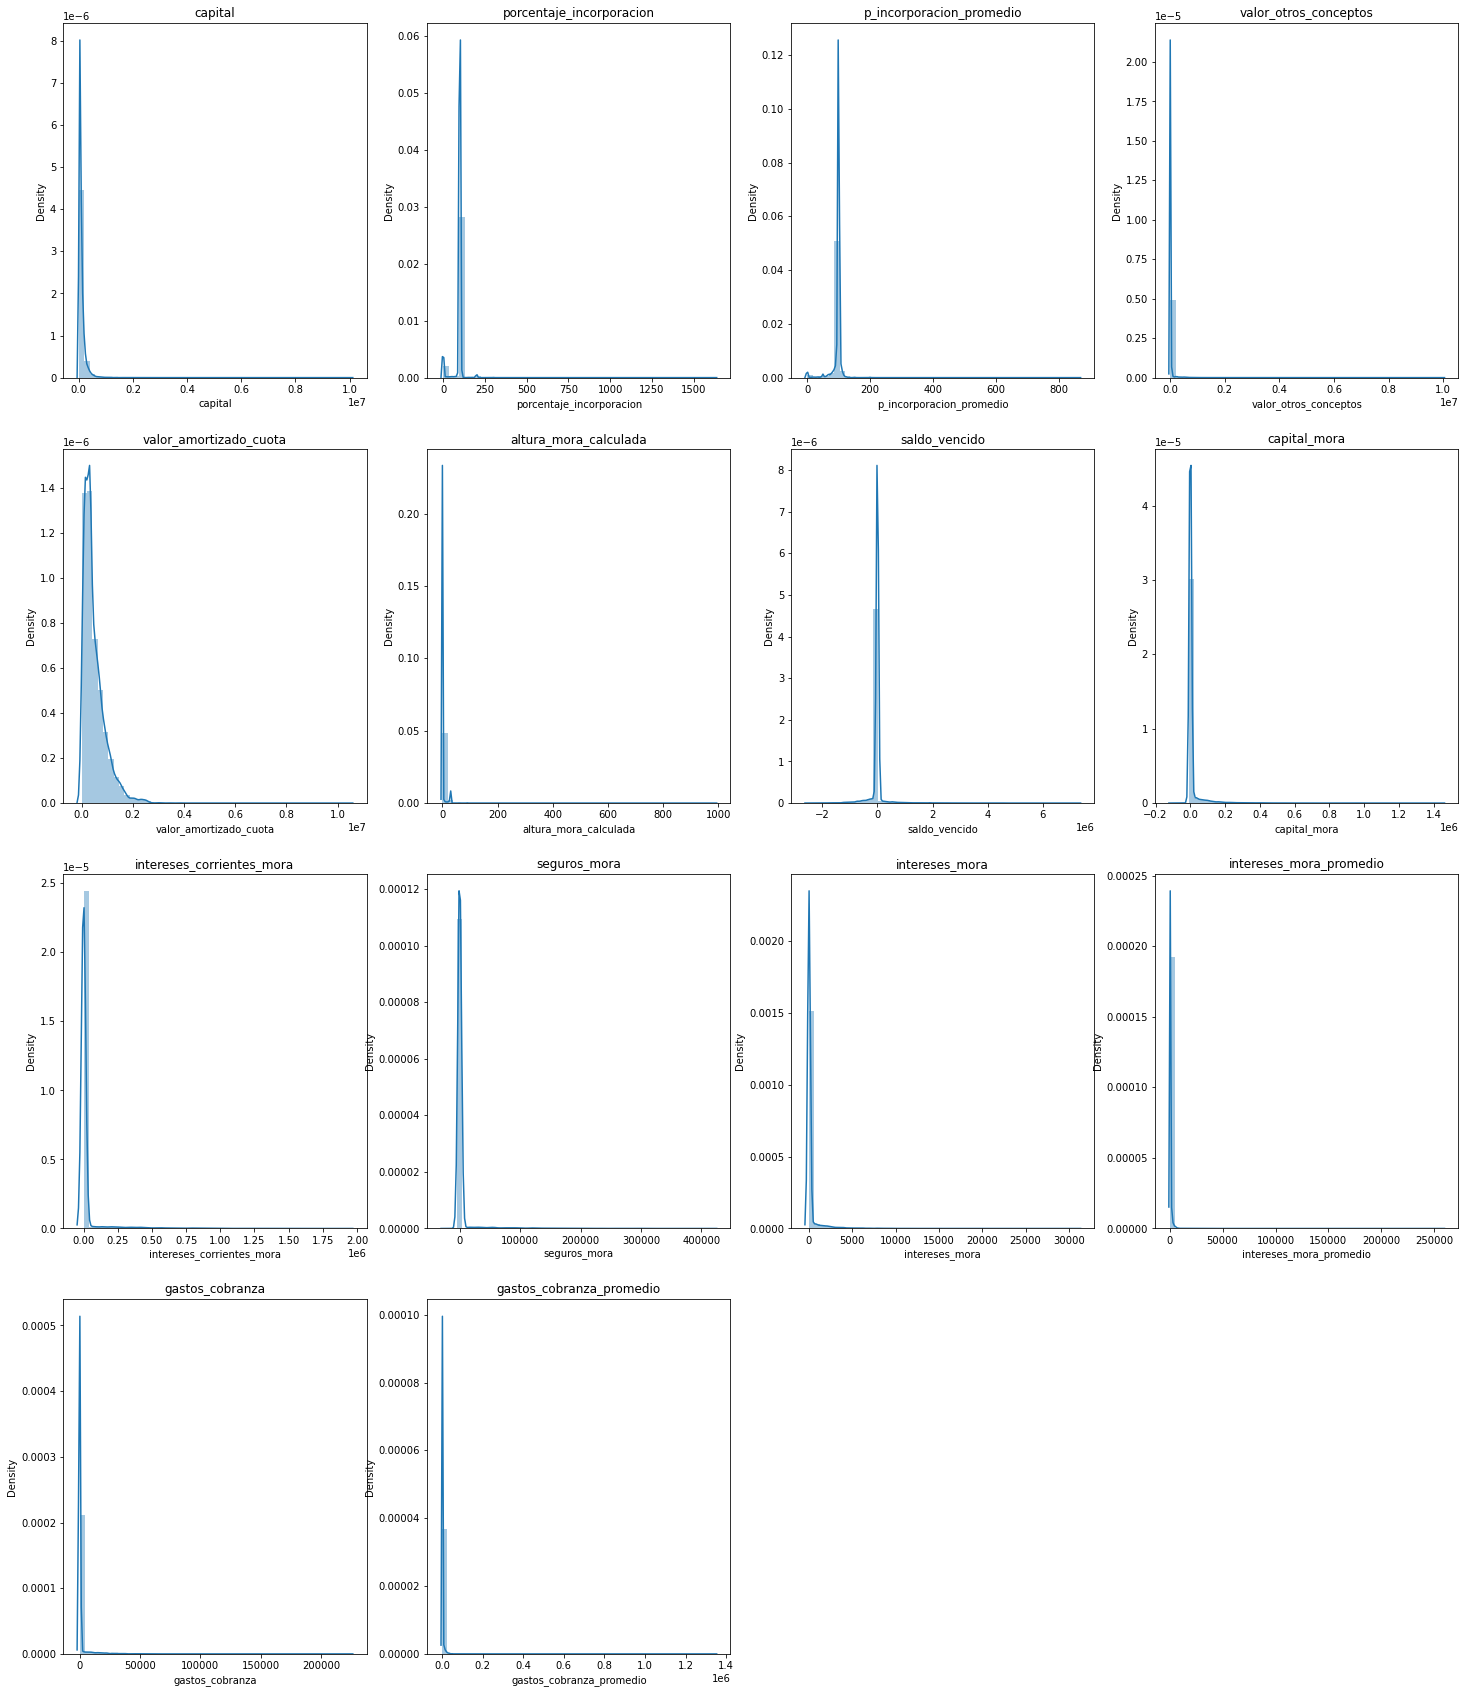

In [41]:
fig = plt.figure(figsize=(25,30))
fig.tight_layout()
#col = df.columns
col = list_col
for i in range(1,15):
    plt.subplot(4,4,i)
    #plt.hist(df[col[i]])
    sns.distplot(X[col[i-1]])
    plt.title(col[i-1])


### Transformación Logaritmica

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22949 entries, 0 to 22948
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fecha_originacion_year            22949 non-null  int64  
 1   fecha_originacion_month           22949 non-null  int64  
 2   fecha_originacion_day             22949 non-null  int64  
 3   valor_esperado                    22949 non-null  float64
 4   capital                           22949 non-null  float64
 5   interes                           22949 non-null  float64
 6   seguros                           22949 non-null  object 
 7   valor_recibido                    22949 non-null  object 
 8   total_cuotas                      22949 non-null  object 
 9   n_pagos_esperados                 22949 non-null  object 
 10  n_pagos_mayores                   22949 non-null  object 
 11  n_pagos_menores                   22949 non-null  object 
 12  n_pa

In [43]:
# Convertir variables 'object' en int
X[X.select_dtypes('object').columns.tolist()] = X.select_dtypes('object').astype(int)

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22949 entries, 0 to 22948
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fecha_originacion_year            22949 non-null  int64  
 1   fecha_originacion_month           22949 non-null  int64  
 2   fecha_originacion_day             22949 non-null  int64  
 3   valor_esperado                    22949 non-null  float64
 4   capital                           22949 non-null  float64
 5   interes                           22949 non-null  float64
 6   seguros                           22949 non-null  int32  
 7   valor_recibido                    22949 non-null  int32  
 8   total_cuotas                      22949 non-null  int32  
 9   n_pagos_esperados                 22949 non-null  int32  
 10  n_pagos_mayores                   22949 non-null  int32  
 11  n_pagos_menores                   22949 non-null  int32  
 12  n_pa

In [45]:
X_trf = X
X_trf[list_col] = np.log(X_trf[list_col]**2+1)

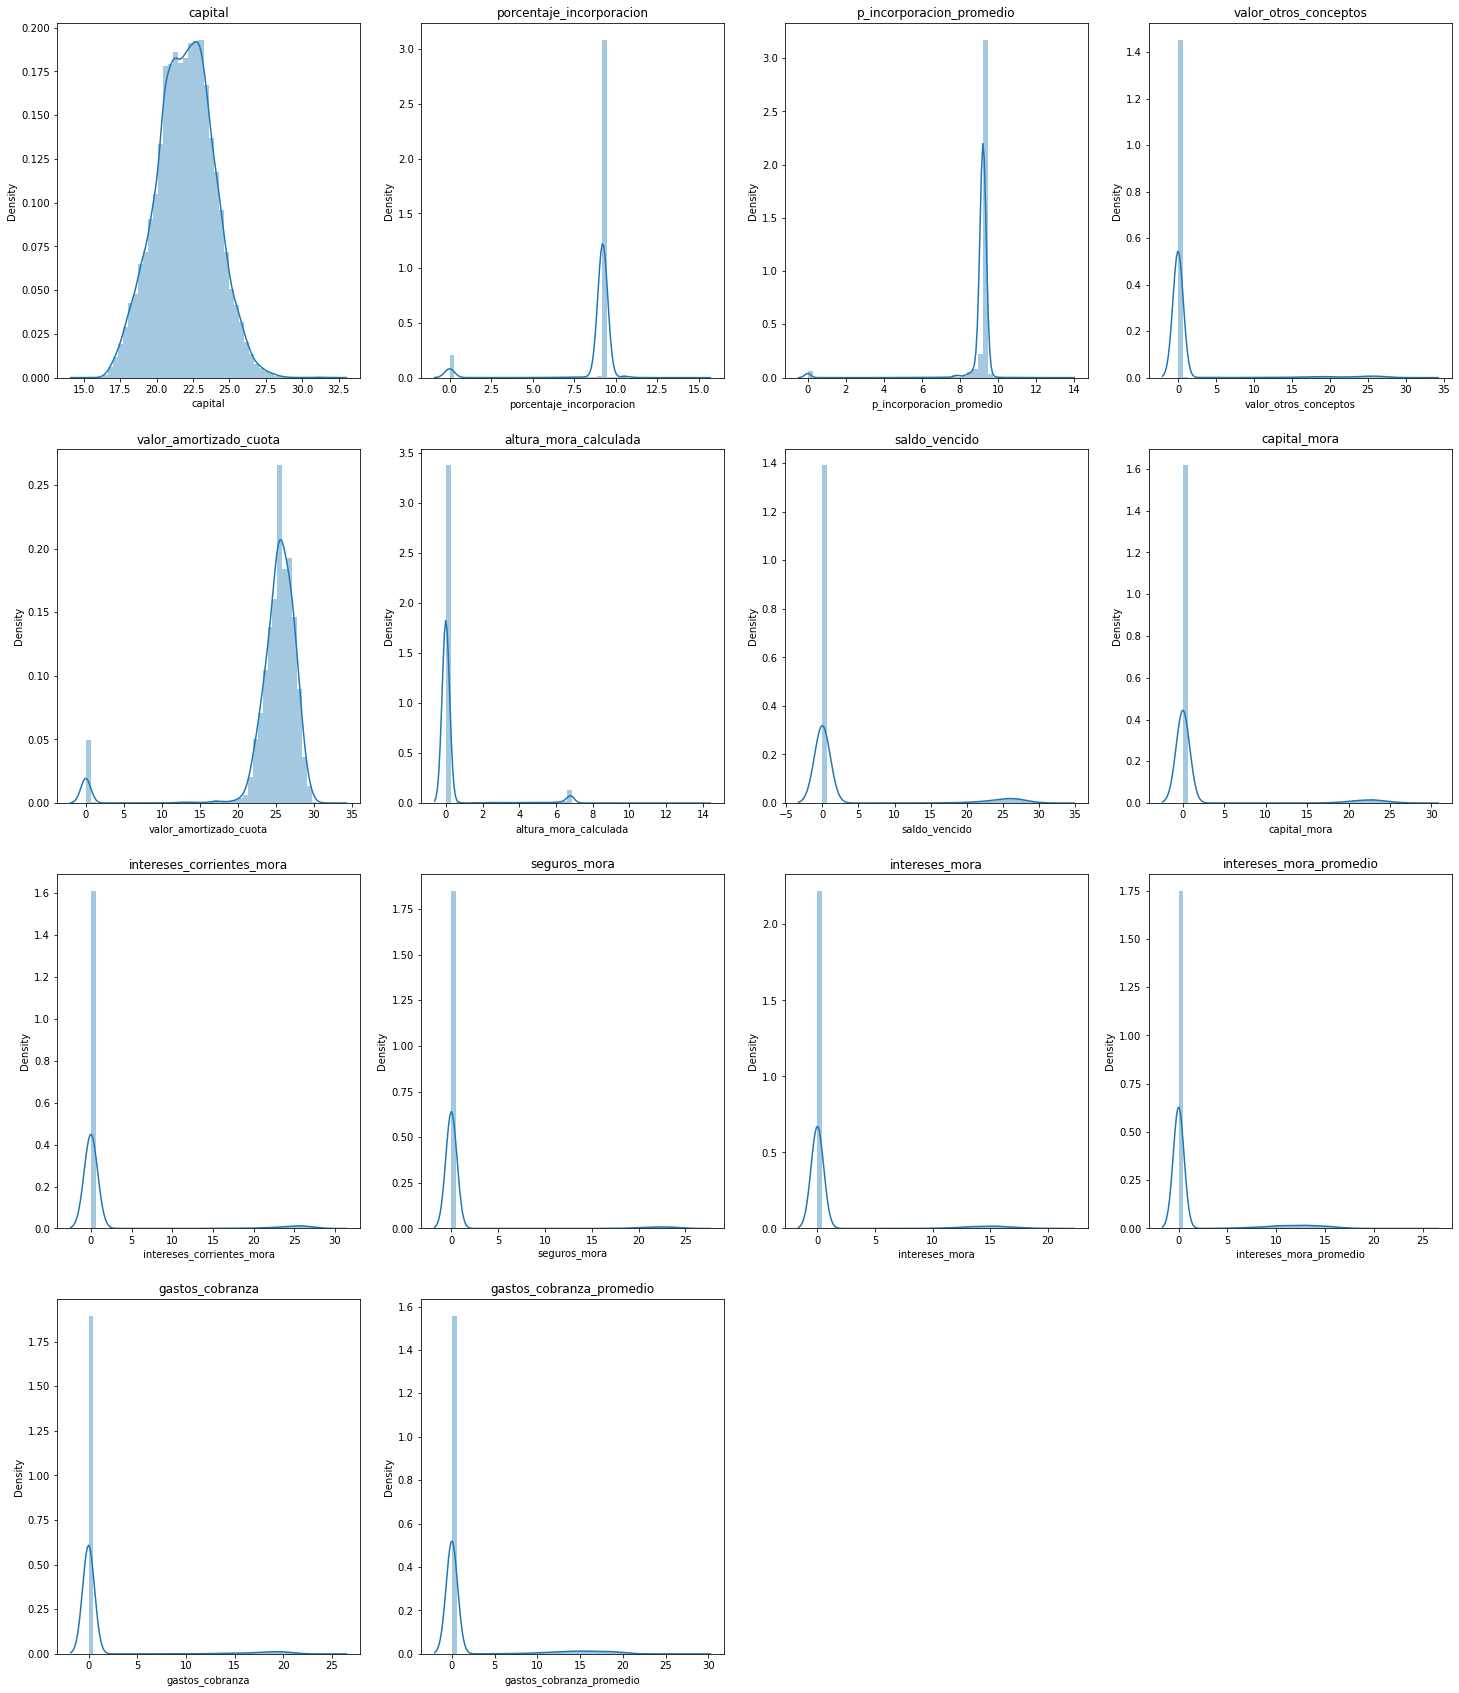

In [46]:
fig = plt.figure(figsize=(25,30))
fig.tight_layout()
#col = df.columns
col = list_col
for i in range(1,15):
    plt.subplot(4,4,i)
    #plt.hist(df[col[i]])
    sns.distplot(X_trf[col[i-1]])
    plt.title(col[i-1])


In [47]:
acv = {'ASIMETRÍA': X_trf.skew(), 'CURTORSIS': X_trf.kurt(), 'VARIANZA': X_trf.var()}
acv =  pd.DataFrame(acv)
acv

,ASIMETRÍA,CURTORSIS,VARIANZA
fecha_originacion_year,-0.527792,-0.194251,1.399573e+00
fecha_originacion_month,0.065967,-1.283667,1.179787e+01
fecha_originacion_day,-0.662809,-0.744988,7.637831e+01
valor_esperado,1.663865,3.446468,1.803729e+11
capital,0.016719,-0.087127,3.926930e+00
interes,1.690692,3.622952,9.004280e+10
seguros,1.768379,3.824968,4.852011e+09
valor_recibido,1.896941,6.599982,1.920925e+11
total_cuotas,1.169779,1.109448,7.742674e+01
n_pagos_esperados,1.134050,1.041863,7.165249e+01


## Importancia de los coeficientes

In [48]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [49]:
model = XGBClassifier()
model.fit(X_trf, Y)
importances = pd.DataFrame(data={
    'Attribute': X_trf.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

[22:15:09] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


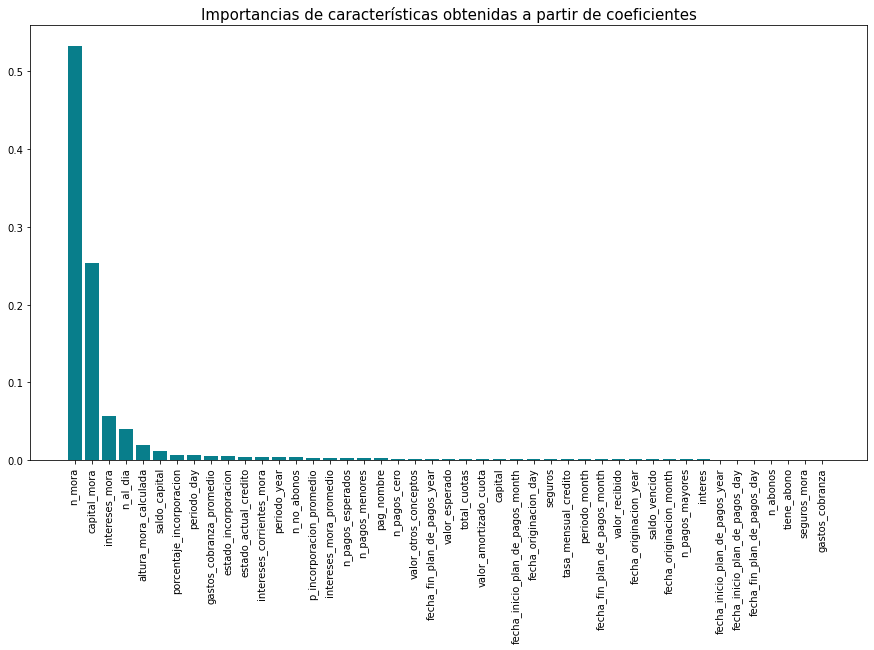

In [50]:
plt.figure(figsize=(15,8))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Importancias de características obtenidas a partir de coeficientes', size=15)
plt.xticks(rotation='vertical')
plt.show()

## Correlación de variables

<AxesSubplot:>

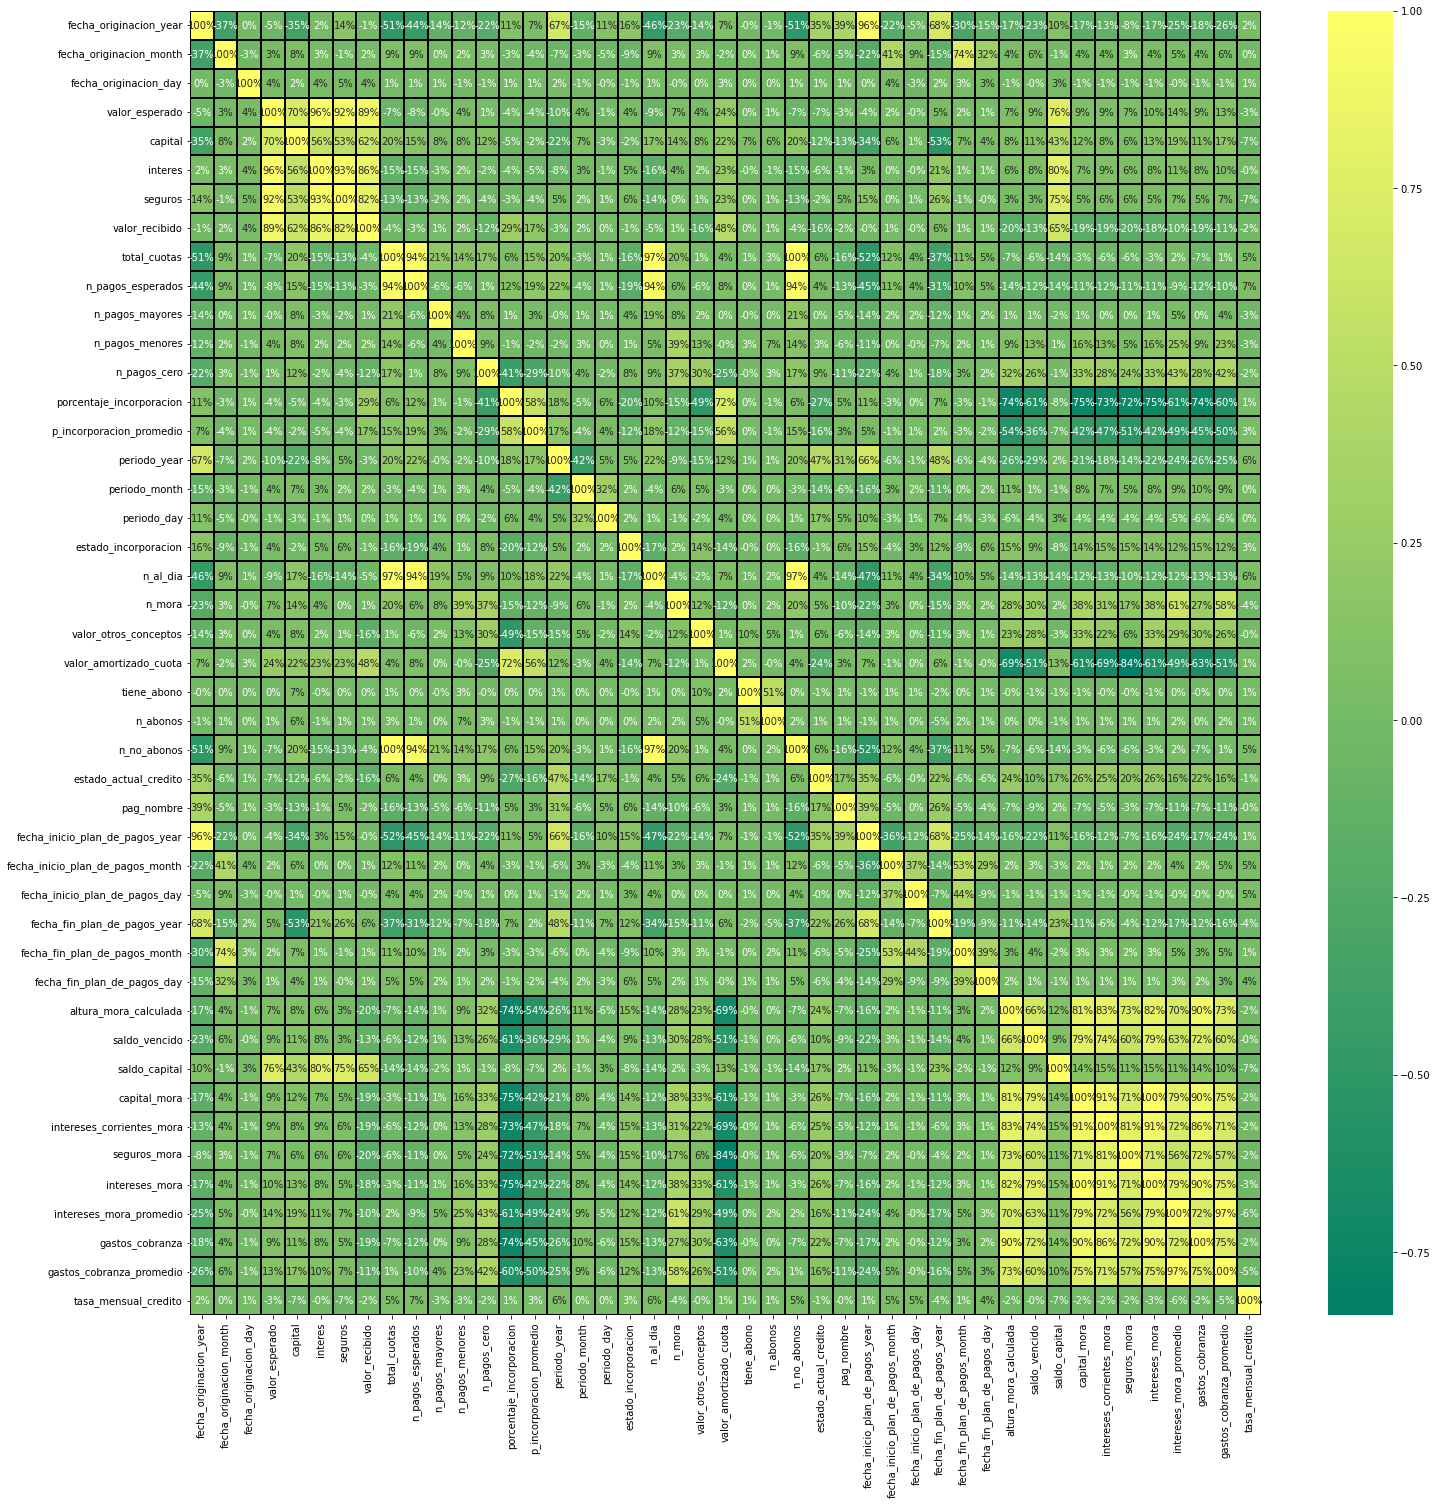

In [51]:
plt.figure(figsize=(24,24))
sns.heatmap(X_trf.corr(), linewidths=0.1, linecolor='black', annot=True, fmt='.0%', cmap='summer')

# BALANCEO DE CLASES

In [61]:
tp=Y.value_counts()

plt_data= [ go.Bar(
  x=tp.index,
  y=tp
  )]

layout= go.Layout(
  title="Proporción de las clases",
  )   

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)


In [62]:
import imblearn

In [63]:
oversample = imblearn.over_sampling.RandomOverSampler(random_state=3)
X_ovs, Y_ovs = oversample.fit_resample(X_trf, Y)

In [101]:
tp=Y_ovs.value_counts()

plt_data= [ go.Bar(
  x=tp.index,
  y=tp
  )]

layout= go.Layout(
  title="Proporción de las clases con Over Sampling",
  )   

fig = go.Figure(data=plt_data, layout=layout)
iplot(fig)

# ENTRENAMIENTO

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [66]:
#over
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_ovs, Y_ovs, test_size=0.2, random_state=123)

In [67]:
names = [
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [68]:
import time
df_results = pd.DataFrame(columns= ['Model', 'Training time'])
clf_entrenados = []
i=0
for name, clf in zip(names, classifiers):
    inicio = time.time()
    model_clf = clf.fit(X_pca_train, y_train)
    #pred = model_clf.predict(X_test)
    clf_entrenados.append(model_clf)
    fin = time.time()
    total_time = fin-inicio
    #print(name + ': '+ str(recall_score(y_test, pred)) + '  -Training time: '+ str(total_time))
    df_results.loc[i] = [name, total_time]
    i += 1

In [69]:
df_results

,Model,Training time
0,Decision Tree,0.136029
1,Random Forest,0.117019
2,AdaBoost,3.705842
3,Naive Bayes,0.041010
4,QDA,0.095021


# MÉTRICAS

In [70]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, cohen_kappa_score

In [71]:
clf_entrenados[0].predict(X_pca_test)

array([1, 1, 1, ..., 0, 0, 1])

In [72]:
df_metrics = pd.DataFrame(columns= ['True Positives', 
                                    'True Negatives', 
                                    'False Positives', 
                                    'False Negatives', 
                                    'Accuracy',
                                    'Kappa', 
                                    'Sensitivity', 
                                    'Specificity',
                                    'Precision',
                                    'f_1 Score'])
i, f = 0, 0

for clf in clf_entrenados:
    #print(nameclf+' - '+list(datos.keys())[i])
    pred = clf.predict(X_pca_test)
    matrix_c = confusion_matrix(y_test, pred)
    TP = matrix_c[1][1]
    TN = matrix_c[0][0]
    FP = matrix_c[0][1]
    FN = matrix_c[1][0]
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # Calculate Kappa
    conf_kappa = cohen_kappa_score(y_test, pred)

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity)) 

    df_metrics.loc[f] = [TP, TN, FP, FN, conf_accuracy, conf_kappa, conf_sensitivity, conf_specificity, conf_precision, conf_f1]
    f+=1
    i+=1


In [73]:
pd.concat([df_results, df_metrics], axis=1)

,Model,Training time,True Positives,True Negatives,False Positives,False Negatives,Accuracy,Kappa,Sensitivity,Specificity,Precision,f_1 Score
0,Decision Tree,0.136029,3994.0,4119.0,14.0,83.0,0.988185,0.976366,0.979642,0.996613,0.996613,0.988054
1,Random Forest,0.117019,3958.0,3903.0,230.0,119.0,0.957491,0.914993,0.970812,0.944350,0.944350,0.957398
2,AdaBoost,3.705842,4030.0,4120.0,13.0,47.0,0.992692,0.985382,0.988472,0.996855,0.996855,0.992646
3,Naive Bayes,0.041010,3509.0,1759.0,2374.0,568.0,0.641657,0.285424,0.860682,0.425599,0.425599,0.569557
4,QDA,0.095021,4006.0,3776.0,357.0,71.0,0.947868,0.895782,0.982585,0.913622,0.913622,0.946850


## Curva de Aprendizaje

In [74]:
from sklearn.model_selection import learning_curve

In [75]:
classifiers[2]

AdaBoostClassifier()

In [96]:
train_sizes, train_scores, test_scores = learning_curve(estimator=classifiers[0],
                        X=X_pca_train, y=y_train, 
                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

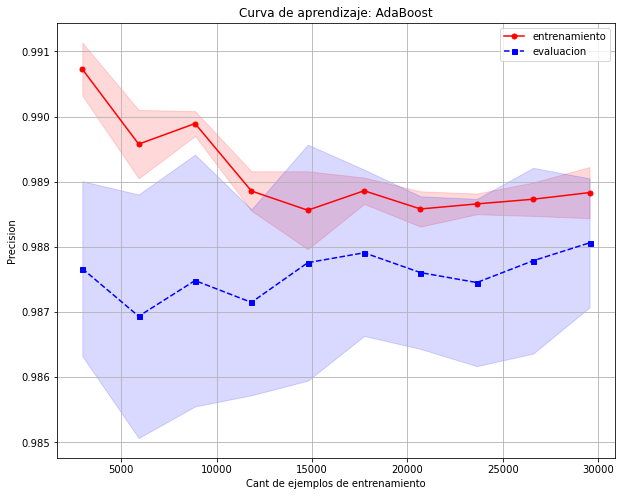

In [100]:
# graficando las curvas
plt.figure(figsize=(10,8))
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='evaluacion')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Curva de aprendizaje: AdaBoost')
plt.legend(loc='upper right')
plt.xlabel('Cant de ejemplos de entrenamiento')
plt.ylabel('Precision')
plt.show()

## Matriz de Confusíon

<AxesSubplot:title={'center':'Curva de aprendizaje: AdaBoost'}>

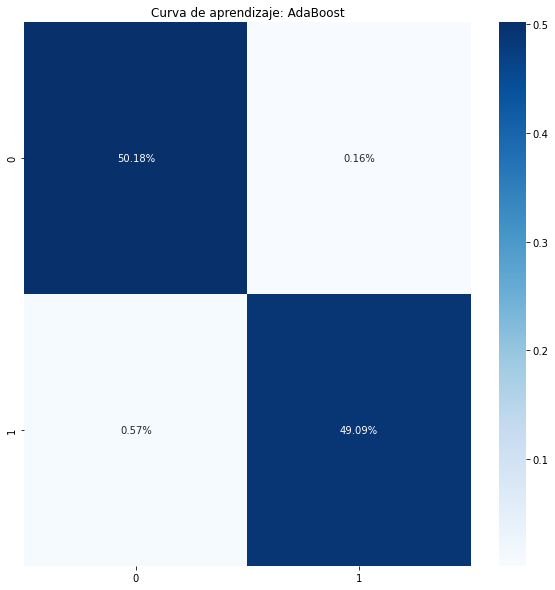

In [98]:
pred = classifiers[2].predict(X_pca_test)
matrix_rm_orig = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,10))
plt.title('Curva de aprendizaje: AdaBoost')
sns.heatmap(matrix_rm_orig/np.sum(matrix_rm_orig), annot=True, fmt='.2%', cmap='Blues')

<Figure size 1800x2160 with 0 Axes>

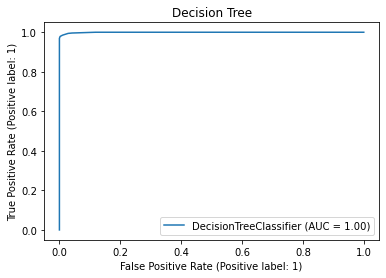

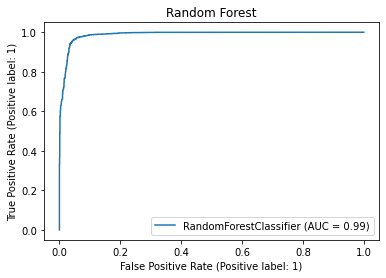

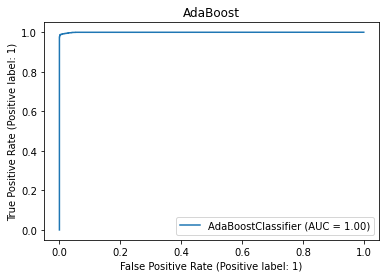

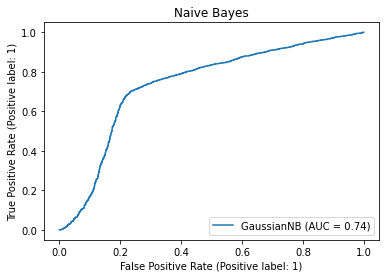

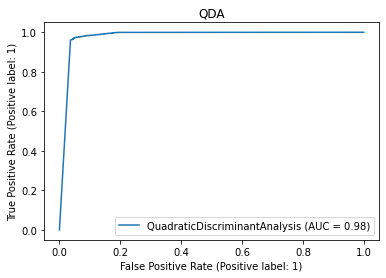

In [94]:
fig = plt.figure(figsize=(25,30))
fig.tight_layout()
i = 0
for name, clf in zip(names, classifiers):
    #plt.subplot(1,10,i)
    plot_roc_curve(clf_entrenados[i], X_pca_test, y_test)
    plt.title(name)
    plt.show()
    i += 1
